# Task 2: Conjugate Gradient Algorithm

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
# Returns a vector, which is the result of the gradient
def gradient(A, b, x):
    return A.dot(x) - b

# Returns a scalar, which is the norm of the result above
def gradientNorm(A, b, x):
    return np.linalg.norm(A.dot(x) - b)

# Returns a scalar, which is the norm of the difference between x and x*
def differenceNorm(x, x_opt):
    return np.linalg.norm(x - x_opt)

# Returns a scalar, which is the norm of x
def norm(x):
    return np.linalg.norm(x)

# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(differenceNorms):
    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(1, differenceNorms.size + 1, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\nconjugate gradient algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)

![image.png](images/conjugateGradient.png)

In [7]:
def conjugateGradient(A, b, maxIters = 5000, epsilon = 10e-5, period = 100):    
    # Dimension of A and b
    dim = b.size
    # initial random vector x filled with the mean of matrix A, with length equal to the dimension
    x = np.repeat(np.mean(A), dim)
    # Fixed step size
    alpha = 0.0001
    # currentIteration
    iter = 1
    # Saving the results
    x_iterations = [x]

    gradients = []
    gradientNorms = []

    rhos = []
    
    while (gradientNorm(A, b, x) > epsilon and iter <= maxIters):
        if (iter % period == 1):
            gradientNorms.append(gradientNorm(A,b,x))
            gradientVector = gradient(A, b, x)
            gradients.append(gradientVector)
            rho = - gradientVector
            rhos.append(rho)
            x = x + alpha * rho
            x_iterations.append(x)        
        else:
            gradientNorms.append(gradientNorm(A,b,x))
            gradients.append(gradient(A, b, x))
            delta = (gradientNorms[iter - 1] ** 2)/(gradientNorms[iter - 2] ** 2)
            rho = - gradients[iter - 1] + delta * rhos[iter - 2]
            rhos.append(rho)
            x = x + alpha * rho
            x_iterations.append(x)
        iter += 1
    
    if iter > maxIters:
        stoppingReason = f"Max iterations ({maxIters}) exceeded"
    else:
        stoppingReason = f"Gradient norm smaller than {epsilon}\nCompleted iteration: {iter}"
    return (x, x_iterations, stoppingReason)

In [8]:
# Plotting the difference norms log ||x - x*||2
def plotDifferenceNorms(scale, maxIter, tolerance, algorithmName, algorithm):

    A = np.load(f"{scale}Matrix.npy", allow_pickle=True)
    # print("The matrix A")
    # print(A)

    b = np.load(f"{scale}Vector.npy", allow_pickle=True)
    # print("\nThe vector b")
    # print(b)
    x_opt = np.load(f"{scale}Solution.npy", allow_pickle=True)

    print(f"\nThe {scale} scale problem is chosen. The matrix A and vector b dimension is {b.size}")
    print(f"The number of maximum iterations is {maxIter}. The allowed tolerance for gradient norm is {tolerance}" )

    start = time.time()
    x_opt_algo, x_iterations_algo, stoppingReason = algorithm(A, b, maxIter, tolerance)
    end = time.time()
    print(f"\nThe {algorithmName} algorithm runs in {end - start} seconds")
    print("Reason of stopping")
    print(stoppingReason)
    if scale == "huge":
        print("\nFirst 100 values in the optimal solution x found by FISTA algorithm")
        print(x_opt_algo[0:100])
        print("\nFirst 100 values in the theoretical optimal solution x*")
        print(x_opt[0:100])
    else:
        print("\nThe optimal solution x found by FISTA algorithm")
        print(x_opt_algo)
        print("\nThe theoretical optimal solution x*")
        print(x_opt)

    differenceNorms = []
    for x_sol in x_iterations_algo:
        differenceNorms.append(differenceNorm(x_sol, x_opt))
    differenceNorms = np.array(differenceNorms)

    figure(figsize=(6, 4), dpi=80)

    iterations = np.arange(0, differenceNorms.size, 1)

    plt.plot(iterations, differenceNorms, label = f"Experimental convergence rate")#, marker='.', markersize=5)
  
    size = 14

    plt.title(f"Convergence rate of\n{algorithmName} algorithm", size=size + 6)
    plt.xticks(fontsize=size)    
    plt.yticks(fontsize=size)  
    plt.yscale('log')
    # plt.xlim(left = 1)
    # plt.xticks(list(plt.xticks()[0]) + [1])
    plt.xlabel("Iterations", size=size)
    plt.ylabel(r'$log||x-x*||_2$', size=size)

    legend = plt.legend(loc=3, frameon=False, fontsize=size)
    plt.show()


The small scale problem is chosen. The matrix A and vector b dimension is 10
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.0001

The conjugate gradient algorithm runs in 0.3369624614715576 seconds
Reason of stopping
Max iterations (20000) exceeded

The optimal solution x found by FISTA algorithm
[ 0.8098545   2.15397725  3.39629243  4.38094139  5.5435401   6.36295014
  6.52212655  7.2855013   8.126463   10.12091571]

The theoretical optimal solution x*
[ 1  2  3  4  5  6  7  8  9 10]


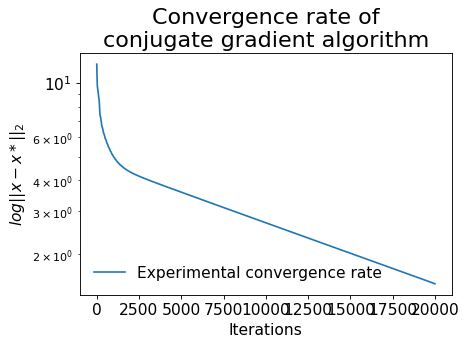


The large scale problem is chosen. The matrix A and vector b dimension is 100
The number of maximum iterations is 20000. The allowed tolerance for gradient norm is 0.001

The conjugate gradient algorithm runs in 7.7909979820251465 seconds
Reason of stopping
Max iterations (20000) exceeded

The optimal solution x found by FISTA algorithm
[  0.21538119  10.15017819  -0.31693629   6.76061085   6.94447891
  15.47348133  20.6914262    1.72477098   4.07474078   8.39893115
  26.66964285  17.46818618  12.49543214  11.50790358  24.99914478
  33.81699201  15.5228767    8.0075149   21.41564402  14.04735094
  34.63369276  23.05801501  18.6044006   20.76462039  28.29200826
  32.09776985  28.25726228  32.27899669  21.80242772  37.53133279
  37.23046943  33.44158506  41.40256484  39.1987884   42.79010164
  40.4900013   31.22712749  42.24572244  39.36872349  47.74459616
  41.08022747  50.8388679   43.47870447  49.29824331  33.95550715
  29.64277607  40.50617141  40.03380016  48.07700508  57.59119785


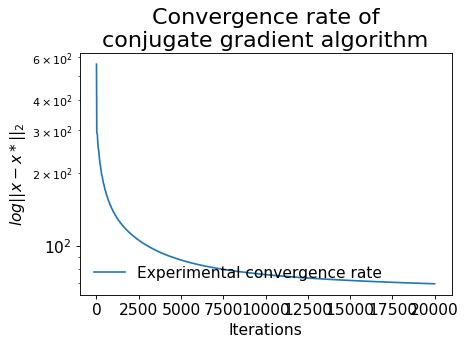


The huge scale problem is chosen. The matrix A and vector b dimension is 1000
The number of maximum iterations is 50000. The allowed tolerance for gradient norm is 0.01

The conjugate gradient algorithm runs in 51.02299952507019 seconds
Reason of stopping
Max iterations (50000) exceeded

First 100 values in the optimal solution x found by FISTA algorithm
[ 22.01336556 -39.78352435  26.66169949  71.21173759 -22.7753494
 132.73096524  48.42335807 -37.13818689   3.25402403  50.82207693
  32.24758339  90.15098529  27.16297975 -46.88850092   8.33073535
  30.14879593  53.74063225  -1.92865313  20.16491597 -43.84441613
 126.70529558  25.06785839  49.36374226 -26.19347306  39.96513954
  70.35964937  21.54476488  51.53164789  -8.73911243  60.6117636
 113.01632057  57.96122571 101.76258991  31.1043527  -37.30060759
  53.34064123 103.45031149 114.34598313   0.75201283  98.37254983
 -37.49361888 -14.78100682  31.22774196  52.25204831  64.53972295
  50.9051919   15.64134426  66.58350606 138.697018

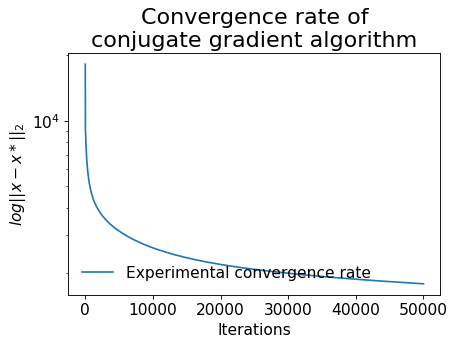

In [9]:
scales = ["small", "large", "huge"]
maxIters = [20000, 20000, 50000]
tolerances = [10e-5, 10e-4, 10e-3]
algorithmName = "conjugate gradient"
algorithm = conjugateGradient
for i in range(0,3):
    plotDifferenceNorms(scales[i], maxIters[i], tolerances[i], algorithmName, algorithm)